<a href="https://colab.research.google.com/github/Jesyldah/Projects/blob/main/Project_Imbalanced_Classification_Jesyldah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression Project

## 1. Defining the Question


### a) Specifying the Data Analysis Question

Predict whether a customer will leave the bank soon, based on past behaviour 

### b) Defining the Metric for Success

The analysis question will be answered by developing a model that would analyze client's past behavior on termination of contracts and predict whether a customer will leave the bank soon. The models F1 score should be at least 0.59 on the test set

### c) Understanding the context 

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones. We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank





### d) Recording the Experimental Design

1. Reading in the data from the source so that it is available for analysis
2. Explore the data in order to understand the structure of the data
3. Prepare the data for analysis:
* Checking for and handling missing values
* Finding and removing duplicate records
* Deleting null columns & rows
* Renaming columns
* Checking for uniformity of data in the columns, correcting errors in values and datatypes
4. Modeling
* Standardize the dataset features
* Define and train the model
* Hyparameter Tuning
* Make predictions using the model
5. Model Evaluation
* Sanity check
* F1 score
* Challenge the model
6. Findings and Recommendations



### e) Data Relevance

The dataset includes clients’ past behavior and termination of contracts with the bank and is therefore relevant in answering the research question


## 2. Reading the Data

In [103]:
# Importing our libraries

import pandas as pd

import numpy as np

In [104]:
# Load the dataset

# Dataset url = https://bit.ly/2XZK7Bo

bank_df = pd.read_csv('https://bit.ly/2XZK7Bo')

In [105]:
# Checking the first 5 rows of data

bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [106]:
# Checking the last 5 rows of data

bank_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [107]:
# Determine the size of the dataset

bank_df.shape

(10000, 14)

In [108]:
# Checking variable datatypes

bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [109]:
# View the variables in the dataset

bank_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

The dataset provided has a total of 10,000 observations and 14 variables. The variables are:
* RowNumber — data string index
* CustomerId — unique customer identifier
* Surname — surname
* CreditScore — credit score
* Geography — country of residence
* Gender — gender
* Age — age
* Tenure — period of maturation for a customer’s fixed deposit (years)
* Balance — account balance
* NumOfProducts — number of banking products used by the customer
* HasCrCard — customer has a credit card
* IsActiveMember — customer’s activeness
* EstimatedSalary — estimated salary
* Exited — сustomer has left


## 3. External Data Source Validation

The data provided is valid

## 4. Data Preparation

### Performing Data Cleaning

In [110]:
# Standardize column names - remove whitespaces and convert names to lowercase

bank_df.columns = bank_df.columns.str.strip().str.lower()

list(bank_df.columns)

['rownumber',
 'customerid',
 'surname',
 'creditscore',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'exited']

In [111]:
# Checking for duplicate rows in the dataset

sum(bank_df.duplicated())

0

There are no duplicate observations in the dataset

In [112]:
# Checking if any of the columns are all null

bank_df.isnull().all(1).any()

False

In [113]:
# Checking if any of the rows are all null

bank_df.isnull().all(0).any()

False

None of the rows or columns are all null

In [114]:
# Check for missing values

print(bank_df.isnull().values.any())

bank_df.isnull().sum()

True


rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [115]:
# Explore missing obersvations

bank_df[bank_df.isnull().any(1)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Only the 'Tenure' variables has missing observations - 909 in total. We can drop these obervations without adversely affecting the dataset as they are few. The tenure variable is useful in model prediction

In [116]:
# Dropping the missing observations 

bank_df1 = bank_df.dropna()

# Checking for missing data

bank_df1.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

The columns 'rownumber', 'customerid', 'surname' can be dropped as they will not be used in model prediction

In [117]:
# Dropping irrelevant columns

bank_df1.drop(["rownumber", "customerid","surname"], axis = 1, inplace = True) 

# Preview our resulting dataset 

bank_df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [118]:
# Obtain summary statistics for the dataset

bank_df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Solution Implementation

### Data Preparation

#### Variable Encoding

Explore the categorical variables in the dataset. These will need to be convert to numerical form for the model to be more accurate

In [119]:
# Explore the datatypes

bank_df1.dtypes

creditscore          int64
geography           object
gender              object
age                  int64
tenure             float64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [120]:
# Obtain unique values for the 'geography' variable

bank_df1.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [121]:
# Obtain unique values for the 'gender' variable

bank_df1.gender.unique()

array(['Female', 'Male'], dtype=object)

Perform lable encoding to transform the categorical variable observations into numeric values

In [122]:
# Transform the features using Label Encoding - using .fit_transform() method

# Import OrdinalEncoder class from the library
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the data for the encoder to recognize which features are categorical
# Transform the data and store it in the bank_df_encoded
# Use the DataFrame() constructor to add column names
bank_df_encoded = pd.DataFrame(encoder.fit_transform(bank_df1), columns=bank_df1.columns)

# Display a preview of the result
print(bank_df_encoded.head())

   creditscore  geography  gender  ...  isactivemember  estimatedsalary  exited
0        226.0        0.0     0.0  ...             1.0           4609.0     1.0
1        215.0        2.0     0.0  ...             1.0           5119.0     0.0
2        109.0        0.0     0.0  ...             0.0           5182.0     1.0
3        306.0        0.0     0.0  ...             0.0           4274.0     0.0
4        457.0        2.0     0.0  ...             1.0           3559.0     0.0

[5 rows x 11 columns]


#### Data standardization - Scaling

The variables are all on different scales, 'estimatedsalary' in monetary values and 'isactivemember' in 0 or 1. We will standardize the data using StandardScaler class

In [123]:
bank_df_encoded.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [124]:
# Import StandardScaler from the library
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler() class
scaler = StandardScaler()

# Define the features
features = ['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary']

# Tune the scaler function using the data
scaler.fit(bank_df_encoded[features])

# Transform the dataset using transform()
bank_df_encoded[features] = scaler.transform(bank_df_encoded[features])

# Display a sample result
print(bank_df_encoded.head())

# Preview the new dataset
bank_df_encoded.tail()

   creditscore  geography    gender  ...  isactivemember  estimatedsalary  exited
0    -0.330442  -0.903184 -1.099164  ...         0.96934         0.024723     1.0
1    -0.444750   1.515683 -1.099164  ...         0.96934         0.219071     0.0
2    -1.546263  -0.903184 -1.099164  ...        -1.03163         0.243079     1.0
3     0.500889  -0.903184 -1.099164  ...        -1.03163        -0.102937     0.0
4     2.070025   1.515683 -1.099164  ...         0.96934        -0.375405     0.0

[5 rows x 11 columns]


,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
9086,1.550444,-0.903184,-1.099164,-0.942855,-1.035627,-0.959269,0.808655,-1.545844,-1.03163,1.164136,0.0
9087,1.249087,-0.903184,0.909782,0.004889,0.000798,-0.959269,0.808655,0.646896,-1.03163,-0.060638,0.0
9088,-1.400780,-0.903184,0.909782,-0.374209,1.728174,-0.902384,-0.912601,0.646896,0.96934,0.031582,0.0
9089,0.604805,-0.903184,-1.099164,-0.279434,0.691748,-0.959269,-0.912601,-1.545844,0.96934,-1.014467,1.0
9090,1.259478,0.306250,0.909782,0.289213,-0.690152,-0.759135,0.808655,0.646896,-1.03163,-0.125801,1.0


### Examine the balance of classes

In [125]:
# Split the dataset into negative and positive classes

features_zeros = bank_df_encoded[bank_df_encoded['exited'] == 0]
features_ones = bank_df_encoded[bank_df_encoded['exited'] == 1]

print(features_zeros.shape)
print(features_ones.shape)


(7237, 11)
(1854, 11)


The dataset has class imbalance, with positive and negative class frequency at 1,854 and 7,237 respectively

### Defining and training the model

#### Datasets, features and target selection

In [126]:
# Split the dataset into training, validation and test datasets

# Import train_test_split from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split function to split the dataset into training, validation and test datasets in the ratio 3:1:1
df_train, df_valid= train_test_split(bank_df_encoded, test_size=0.4,random_state=12345)
df_valid, df_test= train_test_split(df_valid, test_size=0.5,random_state=12345)

# Declare features and target variables for the different datasets
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']
features_test = df_valid.drop(['exited'], axis=1)
target_test = df_valid['exited']

# Display number of observations for each dataset
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(5454, 11)
(1818, 11)
(1819, 11)


### Hyperparameter tuning

Perform hyperparameter tuning using 3 different models and select the best performing (Measure using the f1 score) 

#### Decision tree classifier  model

In [127]:
# import decision tree from the sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Loop over the 'max_depth' hyperparameter to determine the one with highest accuracy score
for depth in range(1, 21):

        # Define the model
        model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth) 

        # Train the model
        model_tree.fit(features_train, target_train) 

        # Predict the target variable for the validation dataset
        predicted_valid_tree = model_tree.predict(features_valid) 

        # Loop through the different depths & Display the f1 score
        print("max_depth =", depth, ": ", end='') 
        print(f1_score(target_valid, predicted_valid_tree)) 

max_depth = 1 : 0.0
max_depth = 2 : 0.5304878048780488
max_depth = 3 : 0.3726708074534161
max_depth = 4 : 0.5414551607445008
max_depth = 5 : 0.5513698630136986
max_depth = 6 : 0.5106382978723404
max_depth = 7 : 0.5315161839863713
max_depth = 8 : 0.5085910652920962
max_depth = 9 : 0.515702479338843
max_depth = 10 : 0.5398773006134969
max_depth = 11 : 0.5142002989536621
max_depth = 12 : 0.4977908689248896
max_depth = 13 : 0.48939179632248936
max_depth = 14 : 0.4778523489932886
max_depth = 15 : 0.4573748308525034
max_depth = 16 : 0.472
max_depth = 17 : 0.4486486486486486
max_depth = 18 : 0.4523809523809524
max_depth = 19 : 0.4623376623376623
max_depth = 20 : 0.4476439790575916


The decision tree classifier model has the highest F1 score of 0.551 when the hyperparameter 'max_depth' = 5 

#### Random Forest

In [128]:
# import random forest classifier from the sklearn library
from sklearn.ensemble import RandomForestClassifier

# Loop over the 'n_estimators' hyperparameter to determine the one with highest accuracy score
for estimator in range(1, 21):
        # Define the model
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=estimator) 
        
        # Train the model
        model_forest.fit(features_train, target_train) 

        # Predict the target variable for the validation dataset
        predicted_valid_forest = model_forest.predict(features_valid) 

        # Loop through the different number of estimators & Display the f1 score
        print("n_estimators =", estimator, ": ", end='') 
        print(f1_score(target_valid, predicted_valid_forest)) 

n_estimators = 1 : 0.5093333333333333
n_estimators = 2 : 0.4319419237749546
n_estimators = 3 : 0.5413533834586467
n_estimators = 4 : 0.48754448398576516
n_estimators = 5 : 0.5331278890600925
n_estimators = 6 : 0.5181347150259067
n_estimators = 7 : 0.548335974643423
n_estimators = 8 : 0.5155709342560554
n_estimators = 9 : 0.5544871794871794
n_estimators = 10 : 0.54421768707483
n_estimators = 11 : 0.5737179487179488
n_estimators = 12 : 0.5371621621621622
n_estimators = 13 : 0.5584415584415585
n_estimators = 14 : 0.5430016863406408
n_estimators = 15 : 0.5620915032679737
n_estimators = 16 : 0.5454545454545454
n_estimators = 17 : 0.5718954248366014
n_estimators = 18 : 0.5652173913043479
n_estimators = 19 : 0.5746753246753247
n_estimators = 20 : 0.5596026490066225


The random forest classifier model has the highest f1 score of 0.575 when the hyperparameter 'n_estimators' = 19

#### Logistic Regression

In [129]:
# import logistic regression from the sklearn library
from sklearn.linear_model import LogisticRegression

# Define the model
model_regression = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 

# Train the model
model_regression.fit(features_train, target_train) 

# Predict the target variable for the validation dataset
predicted_valid_regression = model_regression.predict(features_valid) 

# Display the f1 score
print(f1_score(target_valid, predicted_valid_regression)) 

0.47933884297520657


The logistic regression model has an f1 score of 0.217 and 0.479 with hyperparameter class_weight='balanced'

### Model selection

The random forest classifier model, with n_estimators = 19 attained the highest f1 score of 0.575 on the validation dataset

In [130]:
# Obtain the accuracy score on the test dataset

# Define the model
model_forest2 = RandomForestClassifier(random_state=12345, n_estimators=19) 

# Train the model
model_forest2.fit(features_train, target_train) 

# Predict the target variable for the test dataset
predicted_test_forest2 = model_forest2.predict(features_test) 

 # Display the f1 score
print(f1_score(target_test, predicted_test_forest2))

0.5746753246753247


The trained model then attains an F1 store of 0.575 on the test dataset

In [131]:
# Training the best performing model using the whole train dataset for higher accuracy

# Declare features and target variables
features = bank_df_encoded.drop(['exited'], axis=1)
target = bank_df_encoded['exited']

# Define the model
model = RandomForestClassifier(random_state=12345, n_estimators=19) 

# Train the model
model.fit(features, target) 

# Predict the target variable for the test dataset
predicted = model.predict(features) 

# Display model f1 score
print(f1_score(target, predicted)) 

0.9905020352781546


When we train the selected model (RandomForestClassifier(random_state=12345, n_estimators=19) with the entire dataset, we get an F1 score of 0.99

#### Model sanity check

0.0    0.792629
1.0    0.207371
Name: exited, dtype: float64


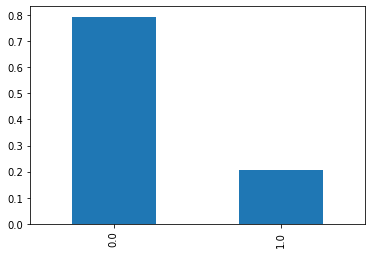

In [132]:
# Obtain sanity check by counting the target variable's class frequencies

# Count classes in the target feature on the test dataset using value_counts() method
# Make the frequencies relative (from 0 to 1)
test_class_frequency = target_test.value_counts(normalize = True) 

 # Print the frequencies on the screen
print(test_class_frequency)

# Display using plot() method
test_class_frequency.plot(kind = 'bar') 

0.0    0.79538
1.0    0.20462
dtype: float64


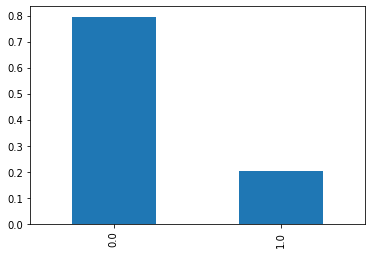

In [133]:
# Analyze the class frequencies of the model predictions on the test dataset using the value_counts() method

# Convert the predictions to pd.Series for value_counts() work
predicted_test = pd.Series(model.predict(features_test))

# Save the counts in the class_frequency variable
# Make the frequencies relative (from 0 to 1)
model_class_frequency = predicted_test.value_counts(normalize = True) 

# Print the frequencies on the screen
print(model_class_frequency) 

# Display using plot() method
model_class_frequency.plot(kind = 'bar') 

Class frequency for the test dataset is:
1. **Class 0: 0.793** 
2. **Class 1: 0.207**

Analyzing the class frequencies using the model predictions on the test data reveals a class frequency of:
1. **Class 0: 0.795** 
2. **Class 1: 0.205**

The classes are equally imbalanced in both cases


### Fix Class Imbalance - Upsampling

Perform class balancing using 'Upsampling' method and observe improvement in model performance

In [134]:
#Import the shuffle() function from the sklearn.utils module.
from sklearn.utils import shuffle

# Define a upsample() function that will return the features and target after upsampling
def upsample(features, target, repeat): 

    # Split the training sample into negative and positive observations.
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Duplicate the positive class observations and combine them with the negative class observations
    # Use the pd.concat() function to concatenate the tables
    # The number of repetitions is stored in the 'repeat' variable.
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # Shuffle the data using the shuffle() function from the sklearn.utils module
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    # The function will return the features and target after upsampling
    return features_upsampled, target_upsampled 

# Call the function for the training data
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

# Define the model
model_upsample = RandomForestClassifier(random_state=12345, n_estimators=19) 

# Train the model
model_upsample.fit(features_upsampled, target_upsampled) 

# Predict the target variable for the test dataset
predicted_upsample_valid = model_upsample.predict(features_valid) 

# Display model f1 score
print(f1_score(target_valid, predicted_upsample_valid)) 


0.5968436154949784


In [135]:
# Calculate f1 score on the test dataset

 # Predict the target variable for the test dataset
predicted_upsample_test = model_upsample.predict(features_test)

# Display model f1 score
print(f1_score(target_test, predicted_upsample_test)) 

0.5968436154949784


Upsampling impoved the F1 score of the model from 0.575 to 0.597 on both the validation and tests data sets

### Fix Class Imbalance - Downsampling

Let us now balance the classes using the 'downsampling' method and observe improvements on the model's F1 score

In [136]:
# Define a downsample() function that will return the features and target after downsampling
def downsample(features, target, fraction):

    # Split the training sample into negative and positive observations.
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Randomly discard some of the table elements use the sample() function
    # Declare downsampled features
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    # Shuffle the data using the shuffle() function from the sklearn.utils module
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )
    # The function will return the features and target after downsampling
    return features_downsampled, target_downsampled  

# Call the function for the training data
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

# Define the model
model_downsample = RandomForestClassifier(random_state=12345, n_estimators=19) 

# Train the model
model_downsample.fit(features_upsampled, target_upsampled) 

# Predict the target variable for the test dataset
predicted_downsample_valid = model_downsample.predict(features_valid) 

# Display model f1 score
print(f1_score(target_valid, predicted_downsample_valid)) 


0.5968436154949784


In [137]:
# Calculate f1 score on the test dataset

# Predict the target variable for the test dataset
predicted_downsample_test = model_downsample.predict(features_test) 

# Display model f1 score
print(f1_score(target_test, predicted_downsample_test)) 

0.5968436154949784


Downsampling and upsampling have resulted to similar model improvement: F1 score improved from 0.575 to 0.597

### Prediction using the trained model

In [138]:
# Preview the dataset

bank_df1.tail()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
9994,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [139]:
# Create new observations to be used in the model

new_features = pd.DataFrame(
    [
        [750,'Germany','Female',32,7,60000,3,1,1,75000],
        [100,'Spain','Male',45,1,0,1,0,0,5000],
        [900,'France','Male',40,15, 80000,2,1,0,150000],
     
    ],
    columns=features.columns,
)

new_features

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,750,Germany,Female,32,7,60000,3,1,1,75000
1,100,Spain,Male,45,1,0,1,0,0,5000
2,900,France,Male,40,15,80000,2,1,0,150000


In [140]:
# Predict the target variable using the new observations

# Perform variable label encoding
new_features_encoded = pd.DataFrame(encoder.fit_transform(new_features), columns=new_features.columns)

# Create an instance of the scaler() and tune the instance using data
scaler = StandardScaler()
scaler.fit(new_features_encoded)

# Transform the dataset
new_features_scaled = scaler.transform(new_features_encoded)

# Obtain model predictions
answers = model.predict(new_features_scaled)

print(answers)

[0. 1. 0.]


### Recommendations

The model is fairly accurate and can be adopted by the bank to predict customer exit


## Challenging your Solution

What if we performed one hot encoding instead of label encoding. Would this improve the model accuracy? Or maybe lead to a different model selection?

In [141]:
# Preview the dataset

bank_df1.head(3)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


#### One-Hot encoding

In [142]:
# One-hot encode the whole dataframe

# Call pd.get_dummies() with the drop_first argument to avoid the dummy trap
bank_df1_ohe = pd.get_dummies(bank_df1,drop_first= True)

# Use the StandardScaler module to standardize the numeric features
# Import StandardScaler from the library
from sklearn.preprocessing import StandardScaler

# Use train_test_split function to split the dataset into training, validation and test datasets in the ratio 3:1:1
df_train2, df_valid2= train_test_split(bank_df1_ohe, test_size=0.4,random_state=12345)
df_valid2, df_test2= train_test_split(df_valid2, test_size=0.5,random_state=12345)

# Declare features and target variables
features_train2 = df_train2.drop(['exited'], axis=1)
target_train2 = df_train2['exited']
features_valid2 = df_valid2.drop(['exited'], axis=1)
target_valid2 = df_valid2['exited']
features_test2 = df_valid2.drop(['exited'], axis=1)
target_test2 = df_valid2['exited']

#Create an instance of the StandardScaler() class 
scaler = StandardScaler()

# Tune the instance using data
scaler.fit(features_train2)
scaler.fit(features_valid2)
scaler.fit(features_test2)

# Transform the datasets
features_train2_ohe_scaled = scaler.transform(features_train2)
features_valid2_ohe_scaled = scaler.transform(features_valid2)
features_test2_ohe_scaled = scaler.transform(features_test2)

In [143]:
# Preview the scaled features

features_train2_ohe_scaled

array([[ 0.75330041, -1.04449308, -1.04062387, ..., -0.5870899 ,
        -0.57184552, -1.09832176],
       [-1.20427642, -1.23479107,  0.71369197, ..., -0.5870899 ,
        -0.57184552,  0.91048001],
       [-0.4521548 ,  0.09729482,  1.4154183 , ..., -0.5870899 ,
        -0.57184552,  0.91048001],
       ...,
       [-1.10124606, -0.94934409,  0.3628288 , ..., -0.5870899 ,
        -0.57184552, -1.09832176],
       [-1.00851874,  1.23908271,  1.4154183 , ..., -0.5870899 ,
        -0.57184552, -1.09832176],
       [ 1.16542184, -1.52023804, -1.04062387, ...,  1.70331663,
        -0.57184552,  0.91048001]])

In [144]:
# Preview the modified table

bank_df1_ohe

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


### New model - Hyperparameter tuning and evaluation

#### Decision tree model

In [145]:
# Use the newly transformed dataset to tune the model hyperparameters

# Loop to get F1 scores using different 'max_depth' values

for depth in range(1, 21):

        # Define the model
        model_tree_new = DecisionTreeClassifier(random_state=12345, max_depth=depth) 

        # Train the model
        model_tree_new.fit(features_train2_ohe_scaled, target_train2) 

        # Predict target for validation dataset
        predicted_valid_tree_new = model_tree_new.predict(features_valid2_ohe_scaled) 

        # Loop through the different depths & # Display model f1 score
        print("max_depth =", depth, ": ", end='') 
        print(f1_score(target_valid2, predicted_valid_tree_new)) 

max_depth = 1 : 0.0
max_depth = 2 : 0.5304878048780488
max_depth = 3 : 0.3726708074534161
max_depth = 4 : 0.5414551607445008
max_depth = 5 : 0.5140712945590994
max_depth = 6 : 0.5606837606837607
max_depth = 7 : 0.5764331210191083
max_depth = 8 : 0.5413290113452188
max_depth = 9 : 0.5446153846153846
max_depth = 10 : 0.5122699386503068
max_depth = 11 : 0.5128205128205129
max_depth = 12 : 0.480225988700565
max_depth = 13 : 0.4840055632823366
max_depth = 14 : 0.48846675712347354
max_depth = 15 : 0.47411444141689374
max_depth = 16 : 0.4795783926218709
max_depth = 17 : 0.48598130841121495
max_depth = 18 : 0.4805369127516779
max_depth = 19 : 0.4862023653088042
max_depth = 20 : 0.47883597883597884


#### Random forest classifier model

In [146]:
# Loop to get F1 score using different 'n_estimators' values

for estimator in range(1, 21):

        # Define the model
        model_forest_new = RandomForestClassifier(random_state=12345, n_estimators=estimator) 

        # Train the model
        model_forest_new.fit(features_train2_ohe_scaled, target_train2) 

        # Predict target for validation dataset
        predicted_valid_forest_new = model_forest_new.predict(features_valid2_ohe_scaled) 

        # Loop through the different number of estimators & # Display model f1 score
        print("n_estimators =", estimator, ": ", end='') 
        print(f1_score(target_valid2, predicted_valid_forest_new)) 

n_estimators = 1 : 0.47925033467202144
n_estimators = 2 : 0.3818181818181818
n_estimators = 3 : 0.526610644257703
n_estimators = 4 : 0.49146757679180886
n_estimators = 5 : 0.5357142857142858
n_estimators = 6 : 0.5378151260504201
n_estimators = 7 : 0.553323029366306
n_estimators = 8 : 0.533106960950764
n_estimators = 9 : 0.57984496124031
n_estimators = 10 : 0.5451505016722408
n_estimators = 11 : 0.5922480620155038
n_estimators = 12 : 0.5723577235772358
n_estimators = 13 : 0.6071987480438185
n_estimators = 14 : 0.5840130505709624
n_estimators = 15 : 0.5971563981042655
n_estimators = 16 : 0.5853658536585366
n_estimators = 17 : 0.5933014354066986
n_estimators = 18 : 0.570957095709571
n_estimators = 19 : 0.5891719745222931
n_estimators = 20 : 0.5723684210526316


#### Logistic regression model

In [147]:
# Get F1 score for the logistic regression model

# Define the model
model_regression_new = LogisticRegression(random_state=12345, solver='liblinear') 

# Train the model
model_regression_new.fit(features_train2_ohe_scaled, target_train2) 

# Predict target for validation dataset
predicted_valid_regression_new = model_regression_new.predict(features_valid2_ohe_scaled) 

 # Display model f1 score
print(f1_score(target_valid2, predicted_valid_regression_new))

0.3033932135728543


### Findings

Encoding the features using the 'One Hote Encoding' method has led to differences in the F1 scores across the 3 model:
1. Decision tree model: From 0.551 with max_depth = 5, to 0.576, with max_depth = 7
2. Random forest model: From 0.575 with n_estimators = 19, to 0.607, with n_estimators = 13
3. Logistic regression model: From 0.479 to 0.303

In [148]:
# Get F1 score of the best performing model using the test dataset

# Define the model
model2 = RandomForestClassifier(random_state=12345, n_estimators=13) 

# Train the model
model2.fit(features_train2_ohe_scaled, target_train2) 

# Predict target for test dataset
predicted_test2 = model2.predict(features_test2_ohe_scaled) 

# Display model f1 score
print(f1_score(target_test2, predicted_test2)) 

0.6071987480438185


The F1 score of the new best performing model 'RandomForestClassifier(random_state=12345, n_estimators=13)', in test dataset increased from 0.575 to 0.607

Let us now train the best performing model using the whole dataset and observe the changes in the prediction for new features. Will they be similar with the previous findings?

In [59]:
# Training the new best performing model using the whole train dataset for higher accuracy

# Declare features and target variables
features2 = bank_df1_ohe.drop(['exited'], axis=1)
target2 = bank_df1_ohe['exited']

# Tune the instance using data
scaler.fit(features2)

# Transform the datasets
features2_ohe_scaled = scaler.transform(features2)

# Define the model
model2 = RandomForestClassifier(random_state=12345, n_estimators=13) 

# Train the model
model2.fit(features2_ohe_scaled, target2) 

# Predict target for the entire dataset
predicted2 = model2.predict(features2_ohe_scaled) 

# Display model f1 score
print(f1_score(target2, predicted2)) 

0.98417894162575


In [149]:
# Predict the target variable using the new observations

# Perform variable one hot encoding
new_features_ohe = pd.get_dummies(new_features,drop_first= True)

# Create an instance of the scaler() and tune the instance using the new dataset
scaler = StandardScaler()
scaler.fit(new_features_ohe)

# Transform the dataset
new_features_ohe_scaled = scaler.transform(new_features_ohe)

# Obtain model predictions
answers2 = model2.predict(new_features_ohe_scaled)

# Display the predictiond on the screen
print(answers)
print(answers2)

[0. 1. 0.]
[0 1 0]


### Summary
* While the F1 scores of the 2 best performing models i.e 'RandomForestClassifier(random_state=12345, n_estimators=19)' and 'RandomForestClassifier(random_state=12345, n_estimators=13)' in test dataset increased from 0.575 to 0.607 after one-hot encoding, the predictions on the 3 new features are the same for both models

* The company can adopt either models with preference for the second model which has a higher F1 score

## 7. Follow up questions

### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?

Yes we did